In [3]:
import pandas as pd
import numpy as np

# Importowanie danych treningowych i testowych
df_train = pd.read_csv(r'/content/Weather Training Data.csv')
df_test = pd.read_csv(r'/content/Weather Test Data.csv')
df = pd.concat([df_train,df_test])

# Resetowanie i usuwanie indeksu
df.reset_index(inplace = True)
df.drop('index',axis = 'columns',inplace = True)
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0


Na początku usuwamy kolumny 'row ID' i 'RainToday', ponieważ te wartości nie pomogą nam w trenowaniu modelu, a także mogłyby zaszkodzić modelowi, gdybyśmy chcieli uzupełnić brakujące wartości w kolumnie RainToday

In [4]:
df.drop(['row ID','RainToday'],axis = 'columns', inplace = True)

<p>Teraz chcemy przyjrzeć się wartościom NaN i zobaczyć, ile brakujących danych mamy w naszym zbiorze danych.</p>


In [5]:
df.isna().sum().sort_values(ascending = False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
RainTomorrow     42677
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Location             0
dtype: int64

<h3>Handling the missing data</h3>

<p>Na pierwszy rzut oka możemy zaobserwować, że w pierwszych kilku kolumnach mamy dużą część danych oznaczonych jako brakujące.<p>
<p>Ale spójrzmy bliżej na zestaw danych i obliczmy procent brakujących danych w całym zestawie danych.</p>

In [6]:
percent = (df.isna().sum()/df.isna().count())*100
percent = percent.sort_values(ascending = False)
total = df.isna().sum().sort_values(ascending = False)

df_insight = pd.concat([total,percent],keys = ['Total','Percentage'],axis = 1)
df_insight['Percentage'] = df_insight['Percentage'].apply(lambda x: round(x,2) )
df_insight

,Total,Percentage
Sunshine,67816,47.69
Evaporation,60843,42.79
Cloud3pm,57094,40.15
Cloud9am,53657,37.74
RainTomorrow,42677,30.01
Pressure9am,14014,9.86
Pressure3pm,13981,9.83
WindDir9am,10013,7.04
WindGustDir,9330,6.56
WindGustSpeed,9270,6.52


<p>Oznacza to, że w pierwszych dwóch kolumnach brakuje ponad 40% danych, nawet wypełnienie ich dowolną strategią mogłoby zaszkodzić modelowi, który chcielibyśmy później wytrenować, więc bardziej prawdopodobne jest, że to kompromis i zamierzamy je porzucić.</p>


In [7]:
df.drop(['Sunshine','Evaporation'],axis = 'columns', inplace = True)

In [8]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
3,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0.0
4,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0.0


<p>Teraz chcielibyśmy przekształcić kolumny kategoryczne na numeryczne. Zrobimy to za pomocą make_column_transformer i SimpleImputer.</p>


In [9]:
#printing out the categorical columns
categorical = df.select_dtypes(include = 'object').columns
print('Categorical Columns:',' | '.join(categorical))

print('_________________________________')

numerical = df.select_dtypes(include = 'float64').columns
print('Numerical Columns:',' | '.join(numerical))

Categorical Columns: Location | WindGustDir | WindDir9am | WindDir3pm
_________________________________
Numerical Columns: MinTemp | MaxTemp | Rainfall | WindGustSpeed | WindSpeed9am | WindSpeed3pm | Humidity9am | Humidity3pm | Pressure9am | Pressure3pm | Cloud9am | Cloud3pm | Temp9am | Temp3pm | RainTomorrow


<p>Tutaj wypełniamy wartości NaN i brakujące, najpierw wybieramy strategię w zależności od wartości liczbowych lub kategorycznych danych i pozwalamy na ich przekształcenie.</p>

In [10]:
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'most_frequent')
ct = make_column_transformer((imp,categorical),
                             (SimpleImputer(strategy = 'median'),numerical),
                            remainder = 'passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1',
                                 SimpleImputer(strategy='most_frequent'),
                                 Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='median'),
                                 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainTomorrow'],
      dtype='object'))])

<p>Tutaj dopasowujemy i przekształcamy dane oraz aktualizujemy ramkę danych.</p>

In [11]:
c,n = np.asarray(categorical),np.asarray(numerical)
transformed = ct.fit_transform(df)
df = pd.DataFrame(transformed,columns = np.concatenate((c,n)))
df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,Albury,W,W,WNW,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0
1,Albury,WNW,NNW,WSW,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0
2,Albury,W,ENE,NW,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
3,Albury,WNW,W,W,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0.0
4,Albury,W,SSE,W,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0.0


<p>Chcielibyśmy upewnić się, że nie ma już żadnych brakujących danych.</p>


In [12]:
def check_nan():
    for count in df.isna().sum():
        if count>0:
            return ('Brakuje danych')

        return ("Nie ma brakujacych danych")

check_nan()

'Nie ma brakujacych danych'

In [13]:
from sklearn.preprocessing import LabelEncoder

for column in categorical:
    df[column] = LabelEncoder().fit_transform(df[column])
#     print(df[column])

df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2,13,13,14,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0
1,2,14,6,15,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0
2,2,13,1,7,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
3,2,14,13,13,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0.0
4,2,13,10,13,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0.0


In [14]:
obj_col = df.select_dtypes(include = 'object')
for column in obj_col:
    df[column] = df[column].astype('float64')

<h2>Correlation Matrix</h2>

Teraz pokazyjemy macierz korelacji, która jest przydatna do poznania, które cechy są najbardziej istotne dla zbioru docelowego, którym jest 'RainTomorrow'.

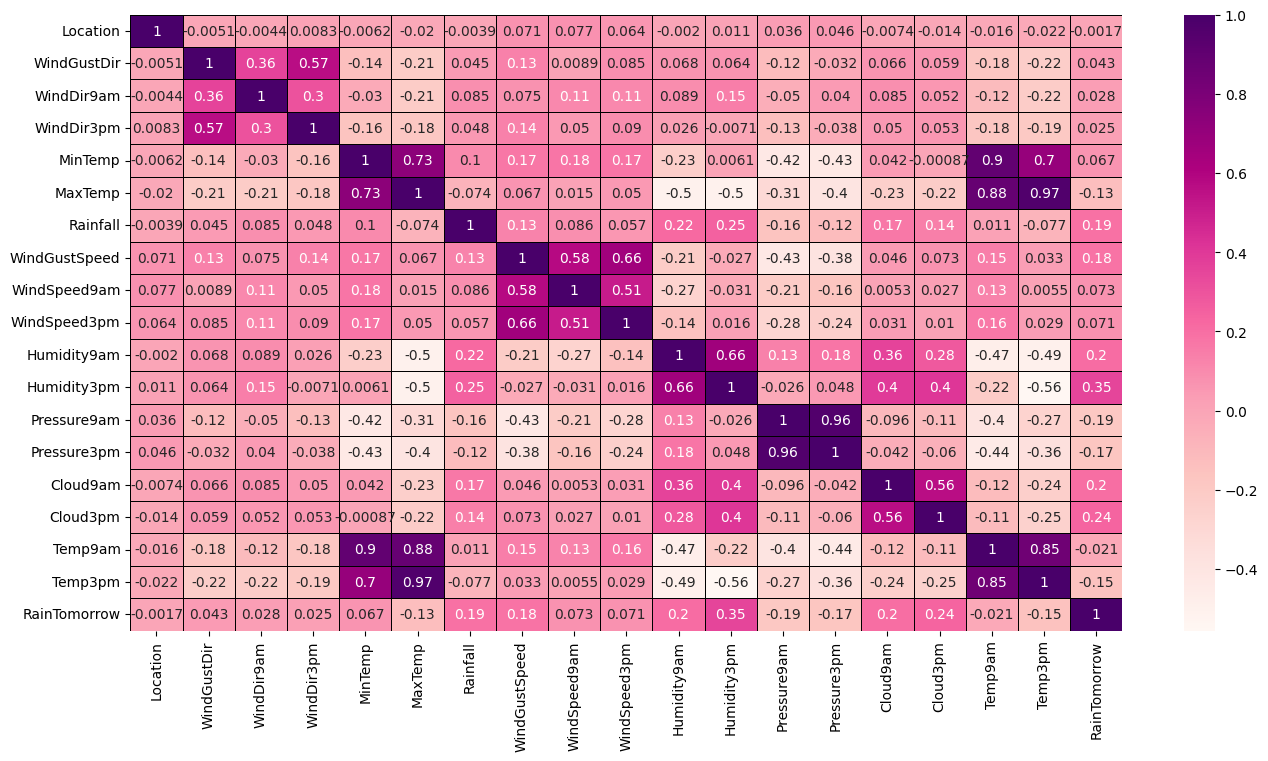

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),cmap = 'RdPu',annot = True,linewidth = 0.5,linecolor = 'black')
plt.show()

<h3>Selecting the appropriate features for our model</h3>

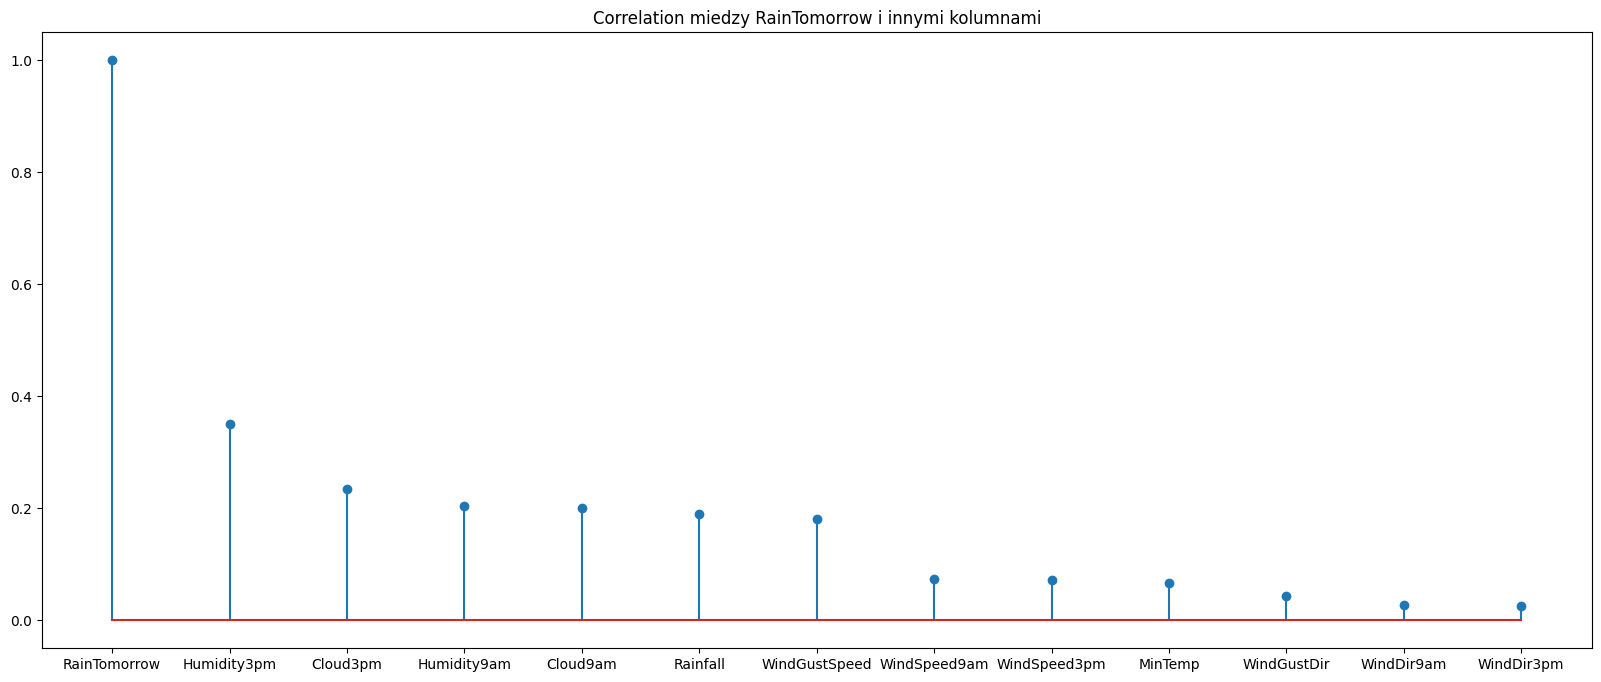

In [16]:
ax = plt.figure(figsize=(20, 8))

info = dict(df.corr()['RainTomorrow'].sort_values(ascending = False))
info = {key:info[key] for key in info if info[key]>0}
# print(info)

plt.title('Correlation miedzy RainTomorrow i innymi kolumnami')
plt.stem(info.keys(),info.values())
plt.show()

Teraz definiujemy nasz zestaw treningowy i chcielibyśmy użyć najbardziej istotnych cech dla cechy docelowej.


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preprocessing - skalowanie cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Zastosowanie PCA
pca = PCA(n_components=0.95)  # Wybór liczby komponentów na podstawie wyjaśnionej wariancji
X_pca = pca.fit_transform(X_scaled)

# Podział danych na zbiór treningowy i testowy
xtrain_pca, xtest_pca, ytrain, ytest = train_test_split(X_pca, y, shuffle=True, test_size=0.25, random_state=101)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain_pca)
xtest = scaler.transform(xtest_pca)

<h2>Trenowanie modeli</h2>

Ze względu na właściwości naszego zbioru docelowego, używamy algorytmów klasyfikacji, takich jak RandomForestClassifier i GradientBoostingClassifier.


<h3>RandomForestClassifier</h3>

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 17,criterion = 'gini')
rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=17)

<h2>Dokladnosc</h2>

In [36]:
from sklearn.metrics import accuracy_score

ypred_rfc = rfc.predict(xtest)
ypred_t_rfc = rfc.predict(xtrain)

print('Test set accuracy is:',accuracy_score(ytest,ypred_rfc))
print('Train set accuracy is:',accuracy_score(ytrain,ypred_t_rfc))

Test set accuracy is: 0.8508818813468734
Train set accuracy is: 0.9436724053861446


<h2>Confusion Matrix</h2>

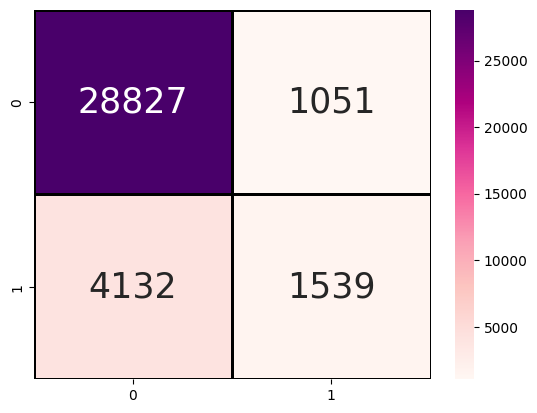

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred_rfc)
cm = pd.DataFrame(cm)
sns.heatmap(cm,annot = True,linewidth = 1,linecolor = 'black',cmap = 'RdPu',fmt = 'g',annot_kws = {'size':25})
plt.show()

<h3>GradientBoostingClassifier</h3>

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(loss = 'log_loss',learning_rate = 0.07,max_depth = 10)

gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.07, max_depth=10)

<h2>Dokladnosc</h2>

In [23]:
ypred_gbc = gbc.predict(xtest)
ypred_t_gbc = gbc.predict(xtrain)

print('Test set accuracy is:',accuracy_score(ytest,ypred_gbc))
print('Train set accuracy is:',accuracy_score(ytrain,ypred_t_gbc))

Test set accuracy is: 0.8516695265689611
Train set accuracy is: 0.925040321068227


<h2>Confusion Matrix</h2>

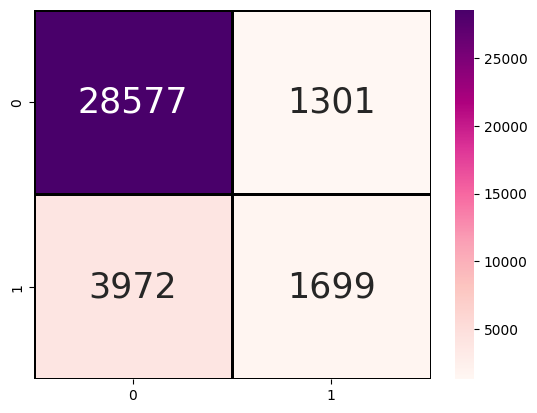

In [24]:
cm = confusion_matrix(ytest,ypred_gbc)
cm = pd.DataFrame(cm)
sns.heatmap(cm,annot = True,linewidth = 1,linecolor = 'black',cmap = 'RdPu',fmt = 'g',annot_kws = {'size':25})
plt.show()

<h3>siec neuronowa</h3>

In [27]:
#!pip uninstall tensorflow
#!pip install tensorflow==2.12.0

import tensorflow.keras as kr
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import time

def create_model(hidden_layers, activation, optimizer, learning_rate):
    num = len(info.keys())-1
    model = kr.Sequential()

    # Warstwa wejściowa
    model.add(kr.layers.Dense(num, activation=activation, kernel_initializer='he_normal', input_shape=(num,)))

    # Warstwy ukryte
    for layer_size in hidden_layers:
        model.add(kr.layers.Dense(layer_size, activation=activation, kernel_initializer='he_normal'))

    # Warstwa wyjściowa
    model.add(kr.layers.Dense(1, activation='sigmoid'))

    # Kompilacja modelu
    model.compile(optimizer=optimizer(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Parametry do przeszukiwania
param_grid = {
    'hidden_layers': [(64,), (64, 32), (64, 32, 16)],
    'activation': ['relu', 'tanh'],
    'optimizer': [kr.optimizers.Adam, kr.optimizers.RMSprop],
    'learning_rate': [0.01],
    'batch_size': [64, 128, 1024],
    'epochs': [50]
}

# Utworzenie modelu do przeszukiwania
model = KerasClassifier(build_fn=create_model, verbose=3)

# Przeszukiwanie siatki parametrów z użyciem tqdm
start_time = time.time()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', verbose=10, cv=2)
grid_result = grid_search.fit(xtrain, ytrain)
end_time = time.time()

# Wyniki przeszukiwania
print("Najlepsze parametry: ", grid_result.best_params_)
print("Najlepszy wynik: ", grid_result.best_score_)

# Obliczenie czasu trwania
elapsed_time = end_time - start_time
print(f"Czas trwania: {elapsed_time:.2f} sekund")

# Zapisanie najlepszego modelu
best_model = grid_result.best_estimator_
best_model.model.save('best_model.h5')

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2; 1/36] START activation=relu, batch_size=64, epochs=50, hidden_layers=(64,), learning_rate=0.01, optimizer=<class 'keras.optimizers.adam.Adam'>
Epoch 1/50


<ipython-input-27-55e99fc71f4c>:43: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=3)


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
1667/1667 [==============================] - 2s 1ms/step
[CV 1/2; 1/36] END activation=relu, batch_size=64, epochs=50, hidden_layers=(64,), learning_rate=0.01, optimizer=<class 'keras.optimizers.adam.Adam'>;, score=0.858 total time= 1.0min
[CV 2/2; 1/36] START activation=relu, batch_size=64, epochs=50, hidden_layers=(64,), learning_rate=0.01, optimizer=<class 'keras.optimizers.adam.Adam'>
Epoch 1/50
Epoch 2/50
Epoch 

Najlepsze parametry:  {'activation': 'relu', 'batch_size': 128, 'epochs': 50, 'hidden_layers': (64, 32, 16), 'learning_rate': 0.01, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>}
Najlepszy wynik:  0.8571884025355387
Czas trwania: 3117.92 sekund

<h2>Confusion Matrix</h2>

1111/1111 [==============================] - 3s 2ms/step


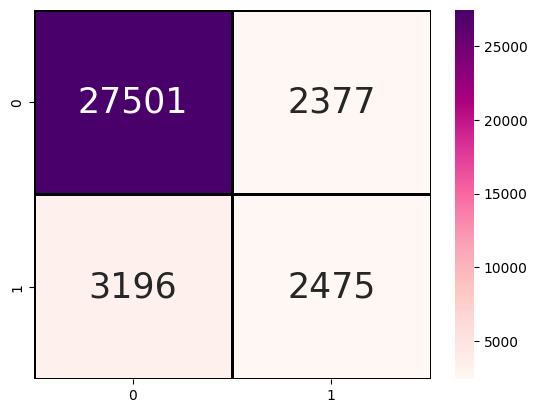

In [29]:
cm = confusion_matrix(ytest,best_model.predict(xtest).round())
cm = pd.DataFrame(cm)
sns.heatmap(cm,annot = True,linewidth = 1,linecolor = 'black',cmap = 'RdPu',fmt = 'g',annot_kws = {'size':25})
plt.show()

<h2>Accuracy</h2>

In [30]:
print('Model accuracy on train set is:',accuracy_score(ytrain,best_model.predict(xtrain).round()))
print('Model accuracy on test set is:',accuracy_score(ytest,best_model.predict(xtest).round()))

3333/3333 [==============================] - 8s 2ms/step
Model accuracy on train set is: 0.8486178312891489
1111/1111 [==============================] - 1s 1ms/step
Model accuracy on test set is: 0.8432304706180201


Dokladnosc modeli

3333/3333 [==============================] - 4s 1ms/step


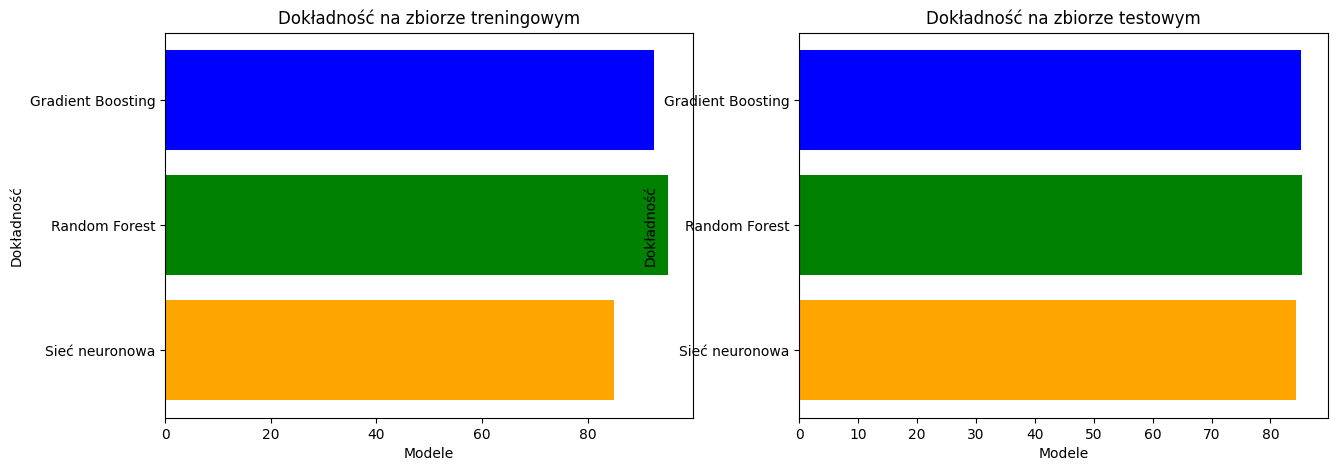

In [32]:
import warnings
warnings.filterwarnings('ignore')

f,axes = plt.subplots(1,2,figsize = (15,5))

models = {'Sieć neuronowa':best_model,"Random Forest":rfc,'Gradient Boosting':gbc}
axes[1].barh(list(models.keys()),[accuracy_score(ytest,model_.predict(xtest).round())*100 for model_ in models.values()],
        color = ['orange','green','blue'])

axes[1].set(xlabel = 'Modele', ylabel = 'Dokładność',title = 'Dokładność na zbiorze testowym')

axes[0].barh(list(models.keys()),[accuracy_score(ytrain,model_.predict(xtrain).round())*100 for model_ in models.values()],
        color = ['orange','green','blue'])

axes[0].set(xlabel = 'Modele', ylabel = 'Dokładność',title = 'Dokładność na zbiorze treningowym')

plt.show()

Konkluzja



1. Preprocessing - skalowanie cech:
   - Użyto `StandardScaler` z biblioteki scikit-learn do standaryzacji cech.
   - Standaryzacja polega na odejmowaniu średniej i dzieleniu przez odchylenie standardowe dla każdej cechy.
   - Skalowanie cech jest ważne przed zastosowaniem PCA, ponieważ PCA jest wrażliwe na skalę cech.

2. Zastosowanie PCA:
   - Użyto klasy `PCA` z biblioteki scikit-learn do redukcji wymiarowości.
   - Parametr `n_components` ustawiono na 0.95, co oznacza, że wybrane zostaną komponenty wyjaśniające 95% wariancji danych.
   - Można dostosować wartość `n_components` w zależności od pożądanego poziomu redukcji wymiarowości.
   - PCA przekształca oryginalne cechy w nowe komponenty, które są liniowymi kombinacjami oryginalnych cech i wyjaśniają największą część wariancji danych.

3. Podział danych na zbiór treningowy i testowy:
   - Po zastosowaniu PCA, dane są dzielone na zbiór treningowy (`xtrain_pca`) i testowy (`xtest_pca`) za pomocą funkcji `train_test_split`.
   - Zbiory treningowy i testowy zawierają teraz zredukowane cechy po zastosowaniu PCA.


Zastosowanie preprocessingu i PCA może przynieść kilka korzyści:
- Redukcja wymiarowości może zmniejszyć złożoność obliczeniową i czas trenowania modeli.
- PCA może pomóc w usunięciu szumu i redundancji z danych, koncentrując się na najbardziej istotnych informacjach.
- Zredukowane dane mogą poprawić wyniki niektórych modeli, szczególnie tych, które są wrażliwe na przekleństwo wymiarowości.




1. Trenowanie modelu RandomForestClassifier:
   - Użyto klasy RandomForestClassifier z biblioteki scikit-learn.
   - Zdefiniowano parametry modelu: n_estimators=100 (liczba drzew), max_depth=17 (maksymalna głębokość drzewa), criterion='gini' (kryterium podziału).
   - Model został dopasowany do danych treningowych za pomocą metody fit().
   - Wybrano RandomForestClassifier ze względu na jego zdolność do radzenia sobie z dużą liczbą cech i dobrą wydajność w problemach klasyfikacji.

2. Ocena dokładności modelu RandomForestClassifier:
   - Użyto funkcji accuracy_score z biblioteki scikit-learn.
   - Dokonano predykcji na zbiorze testowym (ypred_rfc) i treningowym (ypred_t_rfc) za pomocą metody predict().
   - Obliczono dokładność na zbiorze testowym i treningowym, porównując predykcje z rzeczywistymi etykietami.
   - Dokładność pozwala ocenić, jak dobrze model radzi sobie z klasyfikacją na nowych danych.

3. Macierz pomyłek (Confusion Matrix) dla RandomForestClassifier:
   - Użyto funkcji confusion_matrix z biblioteki scikit-learn.
   - Obliczono macierz pomyłek na podstawie predykcji na zbiorze testowym (ypred_rfc) i rzeczywistych etykiet (ytest).
   - Macierz pomyłek pokazuje liczbę poprawnych i błędnych klasyfikacji dla każdej klasy.
   - Wizualizacja macierzy pomyłek za pomocą biblioteki seaborn pozwala łatwo zinterpretować wyniki.

4. Trenowanie modelu GradientBoostingClassifier:
   - Użyto klasy GradientBoostingClassifier z biblioteki scikit-learn.
   - Zdefiniowano parametry modelu: loss='log_loss' (funkcja straty), learning_rate=0.07 (współczynnik uczenia), max_depth=10 (maksymalna głębokość drzewa).
   - Model został dopasowany do danych treningowych za pomocą metody fit().
   - Wybrano GradientBoostingClassifier ze względu na jego zdolność do sekwencyjnego budowania drzew i korygowania błędów poprzednich drzew.

5. Ocena dokładności modelu GradientBoostingClassifier:
   - Podobnie jak w przypadku RandomForestClassifier, użyto funkcji accuracy_score.
   - Dokonano predykcji na zbiorze testowym (ypred_gbc) i treningowym (ypred_t_gbc) za pomocą metody predict().
   - Obliczono dokładność na zbiorze testowym i treningowym.

6. Macierz pomyłek dla GradientBoostingClassifier:
   - Podobnie jak w przypadku RandomForestClassifier, użyto funkcji confusion_matrix.
   - Obliczono macierz pomyłek na podstawie predykcji na zbiorze testowym (ypred_gbc) i rzeczywistych etykiet (ytest).
   - Wizualizacja macierzy pomyłek za pomocą biblioteki seaborn.

7. Trenowanie sieci neuronowej:
   - Zdefiniowano funkcję create_model() do tworzenia modelu sieci neuronowej.
   - Użyto biblioteki Keras do budowy i trenowania sieci neuronowej.
   - Przeszukiwano przestrzeń hiperparametrów za pomocą GridSearchCV z biblioteki scikit-learn.
   - Najlepsze parametry zostały wybrane na podstawie dokładności na zbiorze walidacyjnym.
   - Sieć neuronowa została wybrana ze względu na jej zdolność do modelowania złożonych zależności w danych.

8. Macierz pomyłek dla najlepszego modelu sieci neuronowej:
   - Obliczono macierz pomyłek na podstawie predykcji najlepszego modelu na zbiorze testowym.
   - Wizualizacja macierzy pomyłek za pomocą biblioteki seaborn.

9. Ocena dokładności najlepszego modelu sieci neuronowej:
   - Obliczono dokładność najlepszego modelu na zbiorze treningowym i testowym.
   - Użyto metody predict() do uzyskania predykcji i funkcji accuracy_score() do obliczenia dokładności.

10. Wizualizacja strat w czasie trenowania sieci neuronowej:
    - Wykreślono wykres strat w zależności od epoki trenowania.
    - Użyto biblioteki seaborn do utworzenia wykresu liniowego.
    - Wykres pokazuje, jak wartość funkcji straty zmienia się w czasie trenowania, co pozwala ocenić proces uczenia się modelu.

11. Porównanie dokładności różnych modeli:
    - Porównano dokładność trzech wytrenowanych modeli: sieci neuronowej, RandomForestClassifier i GradientBoostingClassifier.
    - Użyto wykresów słupkowych do wizualizacji dokładności na zbiorze treningowym i testowym dla każdego modelu.
    - Porównanie dokładności pozwala wybrać najlepiej działający model dla danego problemu.

Podsumowując, w kodzie zastosowano różne techniki modelowania, takie jak RandomForestClassifier, GradientBoostingClassifier i sieć neuronowa. Każdy model został wytrenowany, a jego dokładność oceniona na zbiorze treningowym i testowym. Wykorzystano również macierze pomyłek do analizy wyników klasyfikacji. Wybór konkretnych modeli i ich parametrów został dokonany na podstawie ich właściwości i zdolności do radzenia sobie z danym problemem. Ostatecznie, porównano dokładność różnych modeli, aby wybrać najlepiej działający model dla zadanego problemu przewidywania opadów deszczu.

W przedstawionym kodzie użyto trzech różnych modeli uczenia maszynowego: RandomForestClassifier, GradientBoostingClassifier oraz sieci neuronowej. Każdy z tych modeli ma swoje charakterystyczne cechy i zalety.

1. RandomForestClassifier:
   - RandomForestClassifier to model ensemble, który składa się z wielu drzew decyzyjnych.
   - Każde drzewo w lesie losowym jest trenowane na podzbiorze danych treningowych, wybranym losowo z powtórzeniami (bootstrap).
   - Podczas budowy drzew, w każdym węźle wybierana jest losowa podgrupa cech, co zwiększa różnorodność drzew i redukuje ryzyko przeuczenia.
   - Końcowa predykcja jest podejmowana na podstawie większości głosów z wszystkich drzew w lesie.
   - RandomForestClassifier radzi sobie dobrze z dużą liczbą cech i może uchwycić nieliniowe zależności w danych.
   - Jest odporny na przeuczenie i dobrze radzi sobie z szumem w danych.

2. GradientBoostingClassifier:
   - GradientBoostingClassifier to model ensemble oparty na technice boosting.
   - Polega na sekwencyjnym budowaniu drzew decyzyjnych, gdzie każde kolejne drzewo jest trenowane na podstawie błędów popełnionych przez poprzednie drzewa.
   - Każde drzewo przyczynia się do poprawy predykcji poprzez korygowanie błędów poprzednich drzew.
   - Gradient boosting minimalizuje funkcję straty, która mierzy różnicę między predykcjami a rzeczywistymi etykietami.
   - Może uchwycić złożone zależności w danych i osiąga wysoką dokładność predykcji.
   - Jednak może być podatny na przeuczenie, jeśli liczba drzew jest zbyt duża lub głębokość drzew jest zbyt wysoka.

3. Sieć neuronowa:
   - Sieć neuronowa to model inspirowany biologicznymi sieciami neuronowymi w mózgu.
   - Składa się z warstw połączonych neuronów, które przetwarzają i przekazują informacje.
   - Każdy neuron otrzymuje wejście, wykonuje obliczenia i przekazuje wynik do następnej warstwy.
   - Sieci neuronowe są w stanie modelować złożone, nieliniowe zależności w danych.
   - Przez dostosowanie wag połączeń między neuronami, sieć uczy się na podstawie danych treningowych.
   - Głębokie sieci neuronowe (z wieloma warstwami ukrytymi) są szczególnie skuteczne w zadaniach, takich jak rozpoznawanie obrazów lub przetwarzanie języka naturalnego.
   - Jednak sieci neuronowe wymagają dużej ilości danych treningowych i mocy obliczeniowej do efektywnego trenowania.

W przedstawionym kodzie, dla sieci neuronowej zastosowano przeszukiwanie siatki (GridSearchCV) w celu znalezienia optymalnych hiperparametrów, takich jak liczba warstw ukrytych, funkcja aktywacji, optymalizator i współczynnik uczenia. Przeszukiwanie siatki pozwala na systematyczne przetestowanie różnych kombinacji hiperparametrów i wybranie najlepszej konfiguracji na podstawie wyników na zbiorze walidacyjnym.

Ostatecznie, wybór modelu zależy od specyfiki problemu, dostępnych danych i wymagań dotyczących wydajności. W tym przypadku, porównanie dokładności na zbiorze testowym wykazało, że RandomForestClassifier osiągnął najlepsze wyniki, co sugeruje, że jest to odpowiedni model dla tego konkretnego zadania przewidywania opadów deszczu.

Biorąc pod uwagę wyniki przeszukiwania siatki hiperparametrów dla sieci neuronowej, można zauważyć, że najlepsza konfiguracja osiągnęła wynik 0.8571884025355387 na zbiorze walidacyjnym. Czas trwania procesu przeszukiwania wyniósł 3117.92 sekundy (około 52 minut).

Najlepsze parametry dla sieci neuronowej to:
- Funkcja aktywacji: 'relu' (Rectified Linear Unit)
- Rozmiar batcha: 128
- Liczba epok: 50
- Architektura sieci (warstwy ukryte): (64, 32, 16)
- Współczynnik uczenia: 0.01
- Optymalizator: RMSprop

Funkcja aktywacji ReLU wprowadza nieliniowość do sieci i pozwala na efektywne uczenie się złożonych zależności. Rozmiar batcha 128 oznacza, że sieć jest trenowana na porcjach danych o wielkości 128 przykładów w każdej iteracji. Liczba epok równa 50 określa, ile razy sieć przechodzi przez cały zestaw danych treningowych podczas uczenia.

Architektura sieci składa się z trzech warstw ukrytych o rozmiarach 64, 32 i 16 neuronów. Taka konfiguracja pozwala na stopniowe zmniejszanie wymiarowości i ekstrakcję istotnych cech z danych wejściowych.

Współczynnik uczenia 0.01 kontroluje tempo aktualizacji wag podczas procesu optymalizacji. Niższy współczynnik uczenia prowadzi do wolniejszej, ale potencjalnie stabilniejszej konwergencji.

Optymalizator RMSprop (Root Mean Square Propagation) to adaptacyjny algorytm optymalizacji, który dostosowuje współczynniki uczenia dla każdego parametru na podstawie średniej kroczącej jego ostatnich gradientów. Pomaga to w szybszej konwergencji i uniknięciu oscylacji podczas uczenia.

Warto zauważyć, że czas trwania przeszukiwania siatki hiperparametrów (około 52 minut) wskazuje na znaczne zasoby obliczeniowe wymagane do znalezienia optymalnej konfiguracji sieci neuronowej. Jest to typowe dla głębokich sieci neuronowych, które mogą mieć wiele hiperparametrów do dostrojenia.
